In [1]:
#Authors: Wuyan Xu, Charlie Essi, Yev Khmelnitskiy, Dan Rapp

# Dependencies
import pandas as pd
import statsmodels.api as sm
import numpy as np
from api_key import apikey
import matplotlib.pyplot as plt
import requests
import gmaps
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In [2]:
# Store filepaths in a variable
file_one = "Kaggle_Happy.csv"
Output_file = "Drinking_data.csv"

#read the raw data file
drinking_df = pd.read_csv(file_one, encoding="ISO-8859-1")

#display raw data
drinking_df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [3]:
#drinking_sorted_df = drinking_df.sort_values(by='HappinessScore', ascending=False)
#drinking_sorted_df.head()

In [4]:
#Put lists into variables
happiness_list = drinking_df["HappinessScore"]
Beer_list = drinking_df["Beer_PerCapita"]
Spirit_list = drinking_df["Spirit_PerCapita"]
Wine_list = drinking_df["Wine_PerCapita"]
GDP_list = drinking_df["GDP_PerCapita"]
HDI_list = drinking_df["HDI"]

#Create an aggregates score for each country
for country in happiness_list:
    Agg_list = drinking_df["Beer_PerCapita"] + drinking_df["Spirit_PerCapita"] + drinking_df["Wine_PerCapita"]

#Add new aggregate to the dataframe
drinking_df["Aggregate"] = Agg_list

#Display new dataframe
drinking_df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Aggregate
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,583
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,565
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,372
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,369
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,493


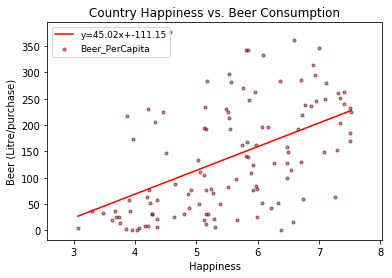

                            OLS Regression Results                            
Dep. Variable:         Beer_PerCapita   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     38.61
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           7.75e-09
Time:                        19:34:51   Log-Likelihood:                -723.16
No. Observations:                 122   AIC:                             1450.
Df Residuals:                     120   BIC:                             1456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -111.1494     40.878     -2.

In [5]:
#Build scatterplot for happiness vs. Beer consumption
plt.scatter(happiness_list, Beer_list, marker=".", facecolors="red", edgecolors="black", alpha =0.5)

# The x-axis limits
plt.xlim(happiness_list.min()-.5, happiness_list.max() + .5)

# Create a title, x label, and y label for scatterplot
plt.title("Country Happiness vs. Beer Consumption")
plt.xlabel("Happiness")
plt.ylabel("Beer (Litre/purchase)")

#construct the regression line
slope, intercept, r_value, p_value, std_err = linregress(happiness_list, Beer_list)

#plot the line, graph, and eqation
line = slope*happiness_list+intercept
plt.plot(happiness_list, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)

#Save the image
plt.savefig("Happy_vs_Beer.png")

# Show the figure
plt.show()

#Display mathematical results
results = sm.OLS(Beer_list,sm.add_constant(happiness_list)).fit()
print(results.summary())

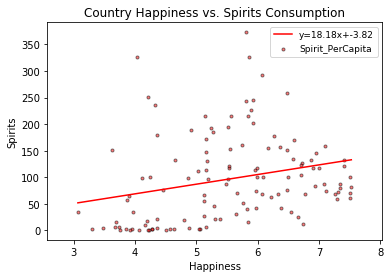

                            OLS Regression Results                            
Dep. Variable:       Spirit_PerCapita   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     8.444
Date:                Thu, 28 Mar 2019   Prob (F-statistic):            0.00436
Time:                        19:34:51   Log-Likelihood:                -705.24
No. Observations:                 122   AIC:                             1414.
Df Residuals:                     120   BIC:                             1420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.8230     35.291     -0.

In [6]:
#Build scatterplot for happiness vs. Spirits consumption
plt.scatter(happiness_list, Spirit_list, marker=".", facecolors="red", edgecolors="black", alpha =0.5)

# The x-axis limits
plt.xlim(happiness_list.min()-.5, happiness_list.max() + .5)

# Create a title, x label, and y label for scatterplot
plt.title("Country Happiness vs. Spirits Consumption")
plt.xlabel("Happiness")
plt.ylabel("Spirits")

#construct the regression line
slope, intercept, r_value, p_value, std_err = linregress(happiness_list, Spirit_list)

#plot the line, graph, and eqation
line = slope*happiness_list+intercept
plt.plot(happiness_list, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)

#Save the image
plt.savefig("Happy_vs_Spirit.png")

# Show the figure
plt.show()

#Display mathematical results
results = sm.OLS(Spirit_list,sm.add_constant(happiness_list)).fit()
print(results.summary())

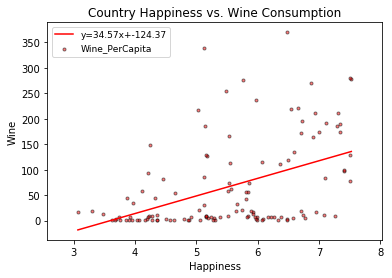

                            OLS Regression Results                            
Dep. Variable:         Wine_PerCapita   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     30.57
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.91e-07
Time:                        19:34:51   Log-Likelihood:                -705.17
No. Observations:                 122   AIC:                             1414.
Df Residuals:                     120   BIC:                             1420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -124.3697     35.272     -3.

In [7]:
#Build scatterplot for happiness vs. Wine consumption
plt.scatter(happiness_list, Wine_list, marker=".", facecolors="red", edgecolors="black", alpha =0.5)

# The x-axis limits
plt.xlim(happiness_list.min()-.5, happiness_list.max() + .5)

# Create a title, x label, and y label for scatterplot
plt.title("Country Happiness vs. Wine Consumption")
plt.xlabel("Happiness")
plt.ylabel("Wine")

#construct the regression line
slope, intercept, r_value, p_value, std_err = linregress(happiness_list, Wine_list)

#plot the line, graph, and eqation
line = slope*happiness_list+intercept
plt.plot(happiness_list, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)

#Save the image
plt.savefig("Happy_vs_Wine.png")

# Show the figure
plt.show()

#Display mathematical results
results = sm.OLS(Wine_list,sm.add_constant(happiness_list)).fit()
print(results.summary())

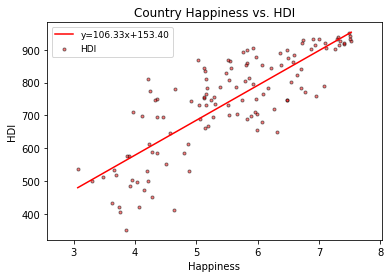

                            OLS Regression Results                            
Dep. Variable:          GDP_PerCapita   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     30.71
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.80e-07
Time:                        19:34:53   Log-Likelihood:                -810.81
No. Observations:                 122   AIC:                             1626.
Df Residuals:                     120   BIC:                             1631.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            546.5008     83.846      6.

In [8]:
#Build scatterplot for happiness vs. HDI
plt.scatter(happiness_list, HDI_list, marker=".", facecolors="red", edgecolors="black", alpha =0.5)

# The x-axis limits
plt.xlim(happiness_list.min()-.5, happiness_list.max() + .5)

# Create a title, x label, and y label for scatterplot
plt.title("Country Happiness vs. HDI")
plt.xlabel("Happiness")
plt.ylabel("HDI")

#construct the regression line
slope, intercept, r_value, p_value, std_err = linregress(happiness_list, HDI_list)

#plot the line, graph, and eqation
line = slope*happiness_list+intercept
plt.plot(happiness_list, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)

#Save the image
plt.savefig("Happy_vs_HDI.png")

# Show the figure
plt.show()

#Display mathematical results
results = sm.OLS(GDP_list,sm.add_constant(happiness_list)).fit()
print(results.summary())

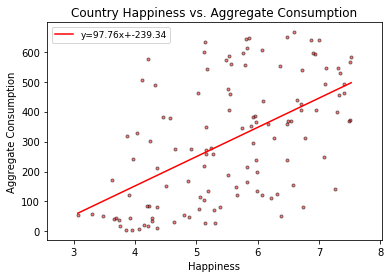

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     51.36
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           6.79e-11
Time:                        19:34:53   Log-Likelihood:                -800.36
No. Observations:                 122   AIC:                             1605.
Df Residuals:                     120   BIC:                             1610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -239.3420     76.964     -3.

In [9]:
#Build scatterplot for happiness vs. Aggregate consumption
plt.scatter(happiness_list, Agg_list, marker=".", facecolors="red", edgecolors="black", alpha =0.5)

# The x-axis limits
plt.xlim(happiness_list.min()-.5, happiness_list.max() + .5)

# Create a title, x label, and y label for scatterplot
plt.title("Country Happiness vs. Aggregate Consumption")
plt.xlabel("Happiness")
plt.ylabel("Aggregate Consumption")

#construct the regression line
slope, intercept, r_value, p_value, std_err = linregress(happiness_list, Agg_list)

#plot the line, graph, and eqation
line = slope*happiness_list+intercept
plt.plot(happiness_list, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)

#Save the image
plt.savefig("Happy_vs_Agg.png")

# Show the figure
plt.show()

#Display mathematical results
results = sm.OLS(Agg_list,sm.add_constant(happiness_list)).fit()
print(results.summary())

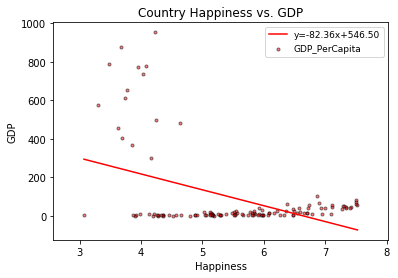

                            OLS Regression Results                            
Dep. Variable:          GDP_PerCapita   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     30.71
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.80e-07
Time:                        19:34:54   Log-Likelihood:                -810.81
No. Observations:                 122   AIC:                             1626.
Df Residuals:                     120   BIC:                             1631.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            546.5008     83.846      6.

In [10]:
#Build scatterplot for happiness vs. GDP
plt.scatter(happiness_list, GDP_list, marker=".", facecolors="red", edgecolors="black", alpha =0.5)

# The x-axis limits
plt.xlim(happiness_list.min()-.5, happiness_list.max() + .5)

# Create a title, x label, and y label for scatterplot
plt.title("Country Happiness vs. GDP")
plt.xlabel("Happiness")
plt.ylabel("GDP")

#construct the regression line
slope, intercept, r_value, p_value, std_err = linregress(happiness_list, GDP_list)

#plot the line, graph, and eqation
line = slope*happiness_list+intercept
plt.plot(happiness_list, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)

#Save the image
plt.savefig("Happy_vs_GDP.png")

# Show the figure
plt.show()

#Display mathematical results
results = sm.OLS(GDP_list,sm.add_constant(happiness_list)).fit()
print(results.summary())

In [11]:
#Defining new columns
drinking_df.reset_index()
drinking_df["Lat"] = ""
drinking_df["Lng"] = ""
drinking_df.head()

#Use API call to get country latitudes & longitudes
for index, row in drinking_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json?&components=country:"
    
    base2_url = "https://maps.googleapis.com/maps/api/geocode/json?&address="
    
    country = row["Country"]
    countries_lat_lng = requests.get(f"{base_url}{country}&key={apikey}")
    
    countries_lat_lng = countries_lat_lng.json()
    try:
        drinking_df.loc[index, "Lat"] = countries_lat_lng["results"][0]["geometry"]["location"]["lat"]
        drinking_df.loc[index, "Lng"] = countries_lat_lng["results"][0]["geometry"]["location"]["lng"]
    except:
        countries2_lat_lng = requests.get(f"{base2_url}{country}%20country&key={apikey}")
            
        countries2_lat_lng = countries2_lat_lng.json()
        
        drinking_df.loc[index, "Lat"] = countries2_lat_lng["results"][0]["geometry"]["location"]["lat"]
        drinking_df.loc[index, "Lng"] = countries2_lat_lng["results"][0]["geometry"]["location"]["lng"]
        
drinking_df

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Aggregate,Lat,Lng
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,583,56.2639,9.50178
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,565,46.8182,8.22751
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,372,64.9631,-19.0208
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,369,60.472,8.46895
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,493,61.9241,25.7482
5,Canada,North America,north,7.404,922,42.349,240,122,100,462,56.1304,-106.347
6,Netherlands,Western Europe,north,7.339,928,45.638,251,88,190,529,52.1326,5.29127
7,New Zealand,Australia and New Zealand,south,7.334,915,40.332,203,79,175,457,-40.9006,174.886
8,Australia,Australia and New Zealand,south,7.313,938,49.897,261,72,212,545,-25.2744,133.775
9,Sweden,Western Europe,north,7.291,932,51.845,152,60,186,398,60.1282,18.6435


In [12]:
#Define list variables
agg_coor = []
wine_coor = []
beer_coor = []
spirit_coor = []
HDI_Coor = []
GDP_coor = []

#Calculate individual scores for each country with respect to the regression line
for country in drinking_df['Country']:
    agg_coor = abs(drinking_df["Aggregate"]-(97.76*(drinking_df["HappinessScore"])-239.34))
    wine_coor = abs(drinking_df["Wine_PerCapita"]-(34.57*(drinking_df["HappinessScore"])-124.37))
    beer_coor = abs(drinking_df["Beer_PerCapita"]-(45.02*(drinking_df["HappinessScore"])-111.15))
    spirit_coor = abs(drinking_df["Spirit_PerCapita"]-(18.18*(drinking_df["HappinessScore"])-3.82))
    HDI_coor = abs(drinking_df["HDI"]-(106.33*(drinking_df["HappinessScore"])+153.4))
    GDP_coor = abs(drinking_df["GDP_PerCapita"]-(-82.36*(drinking_df["HappinessScore"])+546.4))

#Add columns to the dataframe
drinking_df['Aggregate Coorelation'] = agg_coor
drinking_df['Beer Coorelation'] = beer_coor
drinking_df['Wine Coorelation'] = wine_coor
drinking_df['Spirit Coorelation'] = spirit_coor
drinking_df['HDI Coorelation'] = HDI_coor
drinking_df['GDP Coorelation'] = GDP_coor

In [13]:
#Configure gmaps with api key
gmaps.configure(apikey)

#Store lat & long as locations
locations= drinking_df[["Lat","Lng"]]

#Convert & store coorelations as floats
agg_rating= drinking_df["Aggregate Coorelation"].astype(float)
beer_rating= drinking_df["Beer Coorelation"].astype(float)
wine_rating= drinking_df["Wine Coorelation"].astype(float)
spirit_rating= drinking_df["Spirit Coorelation"].astype(float)

In [14]:
figagg = gmaps.figure()
# Create heat layer
heat_layeragg = gmaps.heatmap_layer(locations, weights=agg_rating,
                                dissipating=False,gradient =  [
          'rgba(0, 255, 255, 0)',
          'rgba(0, 255, 255, 1)',
          'rgba(0, 191, 255, 1)',
          'rgba(0, 127, 255, 1)',
          'rgba(0, 63, 255, 1)',
          'rgba(0, 0, 255, 1)',
          'rgba(0, 0, 223, 1)',
          'rgba(0, 0, 191, 1)',
          'rgba(0, 0, 159, 1)',
          'rgba(0, 0, 127, 1)',
          'rgba(63, 0, 91, 1)',
          'rgba(127, 0, 63, 1)',
          'rgba(191, 0, 31, 1)',
          'rgba(255, 0, 0, 1)'
        ]
 , max_intensity=100, point_radius=1)


# Add layer
figagg.add_layer(heat_layeragg)

# Display figure
figagg

Figure(layout=FigureLayout(height='420px'))

In [15]:
figbeer = gmaps.figure()
# Create heat layer
heat_layerbeer = gmaps.heatmap_layer(locations, weights=beer_rating,
                                dissipating=False,gradient =  [
          'rgba(0, 255, 255, 0)',
          'rgba(0, 255, 255, 1)',
          'rgba(0, 191, 255, 1)',
          'rgba(0, 127, 255, 1)',
          'rgba(0, 63, 255, 1)',
          'rgba(0, 0, 255, 1)',
          'rgba(0, 0, 223, 1)',
          'rgba(0, 0, 191, 1)',
          'rgba(0, 0, 159, 1)',
          'rgba(0, 0, 127, 1)',
          'rgba(63, 0, 91, 1)',
          'rgba(127, 0, 63, 1)',
          'rgba(191, 0, 31, 1)',
          'rgba(255, 0, 0, 1)'
        ]
 , max_intensity=100, point_radius=1)


# Add layer
figbeer.add_layer(heat_layerbeer)

# Display figure
figbeer

Figure(layout=FigureLayout(height='420px'))

In [16]:
figwine = gmaps.figure()
# Create heat layer
heat_layerwine = gmaps.heatmap_layer(locations, weights=wine_rating,
                                dissipating=False,gradient =  [
          'rgba(0, 255, 255, 0)',
          'rgba(0, 255, 255, 1)',
          'rgba(0, 191, 255, 1)',
          'rgba(0, 127, 255, 1)',
          'rgba(0, 63, 255, 1)',
          'rgba(0, 0, 255, 1)',
          'rgba(0, 0, 223, 1)',
          'rgba(0, 0, 191, 1)',
          'rgba(0, 0, 159, 1)',
          'rgba(0, 0, 127, 1)',
          'rgba(63, 0, 91, 1)',
          'rgba(127, 0, 63, 1)',
          'rgba(191, 0, 31, 1)',
          'rgba(255, 0, 0, 1)'
        ]
 , max_intensity=100, point_radius=1)


# Add layer
figwine.add_layer(heat_layerwine)

# Display figure
figwine

Figure(layout=FigureLayout(height='420px'))

In [17]:
figspirit = gmaps.figure()
# Create heat layer
heat_layerspirit = gmaps.heatmap_layer(locations, weights=spirit_rating,
                                dissipating=False,gradient =  [
          'rgba(0, 255, 255, 0)',
          'rgba(0, 255, 255, 1)',
          'rgba(0, 191, 255, 1)',
          'rgba(0, 127, 255, 1)',
          'rgba(0, 63, 255, 1)',
          'rgba(0, 0, 255, 1)',
          'rgba(0, 0, 223, 1)',
          'rgba(0, 0, 191, 1)',
          'rgba(0, 0, 159, 1)',
          'rgba(0, 0, 127, 1)',
          'rgba(63, 0, 91, 1)',
          'rgba(127, 0, 63, 1)',
          'rgba(191, 0, 31, 1)',
          'rgba(255, 0, 0, 1)'
        ]
 , max_intensity=100, point_radius=1)


# Add layer
figspirit.add_layer(heat_layerspirit)

# Display figure
figspirit

Figure(layout=FigureLayout(height='420px'))

In [18]:
#Save the datafrome as .csv
drinking_df.to_csv(Output_file, index=True, header = True)